# Negation scope - withOUT bag of words

## Definition of all the imports and constants

In [1]:
# Define all the imports and constants
import pickle

from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from utils.dataset import preprocess_dataset, get_datasets, load_dataset, dataset_name
from utils.scope import create_semi_dataset, create_columns_names, create_features_list, show_metrics_on_all_datasets
from utils.common import print_score, show_roc_curve, save_model, create_vectorizer

FUNCTIONS = {
        'create_semi_dataset': create_semi_dataset,
        'create_vectorizer': create_vectorizer,
        'create_columns_names': create_columns_names,
        'create_features_list': create_features_list,
}

SUFFIX = 'sco'

## Creation of datasets & preprocessing

In [2]:
# Preprocess SNK dataset
preprocess_dataset('dataset/all/merged.xml', SUFFIX, False, FUNCTIONS)

utils.dataset - INFO - ***** Create dataset all *****


utils.dataset - INFO - [START] Creating semi dataset


utils.dataset - INFO - [START] Creating features list - train


utils.dataset - INFO - [START] Creating features list - test


utils.dataset - INFO - [START] Saving CSV


utils.dataset - INFO - [FINISH] Saving CSV


In [3]:
%%time
# Preprocess all datasets - it takes a long time

for dataset in get_datasets(with_all=False):
    preprocess_dataset(dataset, SUFFIX, False, FUNCTIONS)

utils.dataset - INFO - ***** Create dataset beletria *****


utils.dataset - INFO - [START] Creating semi dataset


utils.dataset - INFO - [START] Creating features list - train


utils.dataset - INFO - [START] Creating features list - test


utils.dataset - INFO - [START] Saving CSV


utils.dataset - INFO - [FINISH] Saving CSV


utils.dataset - INFO - ***** Create dataset recenzie *****


utils.dataset - INFO - [START] Creating semi dataset


utils.dataset - INFO - [START] Creating features list - train


utils.dataset - INFO - [START] Creating features list - test


utils.dataset - INFO - [START] Saving CSV


utils.dataset - INFO - [FINISH] Saving CSV


utils.dataset - INFO - ***** Create dataset snk *****


utils.dataset - INFO - [START] Creating semi dataset


utils.dataset - INFO - [START] Creating features list - train


utils.dataset - INFO - [START] Creating features list - test


utils.dataset - INFO - [START] Saving CSV


utils.dataset - INFO - [FINISH] Saving CSV


utils.dataset - INFO - ***** Create dataset sport *****


utils.dataset - INFO - [START] Creating semi dataset


utils.dataset - INFO - [START] Creating features list - train


utils.dataset - INFO - [START] Creating features list - test


utils.dataset - INFO - [START] Saving CSV


utils.dataset - INFO - [FINISH] Saving CSV


utils.dataset - INFO - ***** Create dataset vlastne_mario *****


utils.dataset - INFO - [START] Creating semi dataset


utils.dataset - INFO - [START] Creating features list - train


utils.dataset - INFO - [START] Creating features list - test


utils.dataset - INFO - [START] Saving CSV


utils.dataset - INFO - [FINISH] Saving CSV


CPU times: user 2min 29s, sys: 4.16 s, total: 2min 33s
Wall time: 2min 41s


## Training

In [3]:
%%time

# Load preprocessed dataset
DATASET = 'dataset/all/merged.csv'
X_train, X_test, Y_train, Y_test = load_dataset(DATASET, SUFFIX, ['token', 'lemma', 'POS', 'is_in_scope'])

CPU times: user 1.9 s, sys: 286 ms, total: 2.19 s
Wall time: 2.5 s


In [4]:
%%time

ALGORITHM = 'RandomForest'

# Train a model using the training sets 
# model = MultinomialNB()
# model = GaussianNB()
# model = BernoulliNB()
# model = SVC()
model = RandomForestClassifier(n_estimators=200, bootstrap=False, criterion='entropy')

model.fit(X_train, Y_train.is_in_scope)

CPU times: user 16.7 s, sys: 378 ms, total: 17.1 s
Wall time: 19.2 s


## Metrics

Accuracy: 0.9405465288035451
Precision: 0.8818525519848771
Recall: 0.7226955848179706
F1 score: 0.7943805874840357
Classification report:
             precision    recall  f1-score   support

          0       0.95      0.98      0.97      6833
          1       0.88      0.72      0.79      1291

avg / total       0.94      0.94      0.94      8124



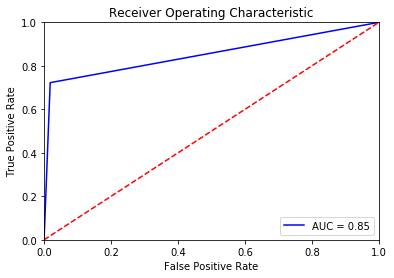

In [5]:
y_predicted = model.predict(X_test)
y_true = Y_test.is_in_scope

# Print basic metrics
print_score(y_predicted, y_true)

# Show ROC curve
show_roc_curve(y_predicted, y_true, save_name='{}-{}-{}-main.svg'.format(SUFFIX, dataset_name(DATASET), ALGORITHM))

## Metric on all datasets

beletria


Accuracy: 0.9238880627281331
Precision: 0.8237822349570201
Recall: 0.5665024630541872
F1 score: 0.6713368359603035
Classification report:
             precision    recall  f1-score   support

          0       0.93      0.98      0.96      6382
          1       0.82      0.57      0.67      1015

avg / total       0.92      0.92      0.92      7397



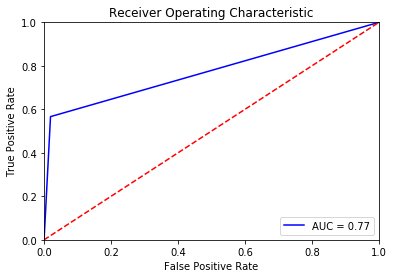

recenzie


Accuracy: 0.9232655921513665
Precision: 0.7440318302387268
Recall: 0.6960297766749379
F1 score: 0.7192307692307692
Classification report:
             precision    recall  f1-score   support

          0       0.95      0.96      0.96      4902
          1       0.74      0.70      0.72       806

avg / total       0.92      0.92      0.92      5708



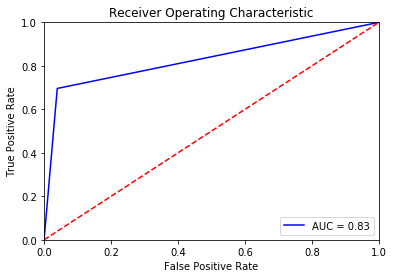

snk


Accuracy: 0.9877472262421612
Precision: 0.9555555555555556
Recall: 0.9475683890577508
F1 score: 0.9515452117512401
Classification report:
             precision    recall  f1-score   support

          0       0.99      0.99      0.99      9049
          1       0.96      0.95      0.95      1316

avg / total       0.99      0.99      0.99     10365



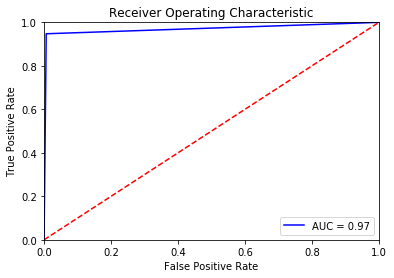

sport


Accuracy: 0.903951367781155
Precision: 0.9011576135351737
Recall: 0.5984624482554701
F1 score: 0.7192608386638236
Classification report:
             precision    recall  f1-score   support

          0       0.90      0.98      0.94      6534
          1       0.90      0.60      0.72      1691

avg / total       0.90      0.90      0.90      8225



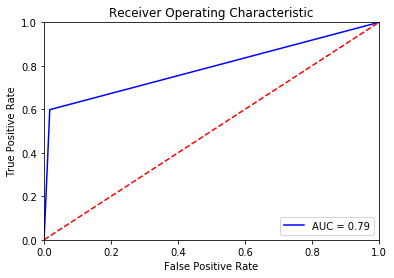

vlastne_mario


Accuracy: 0.8875968992248062
Precision: 0.6967213114754098
Recall: 0.6296296296296297
F1 score: 0.66147859922179
Classification report:
             precision    recall  f1-score   support

          0       0.92      0.94      0.93       639
          1       0.70      0.63      0.66       135

avg / total       0.88      0.89      0.89       774



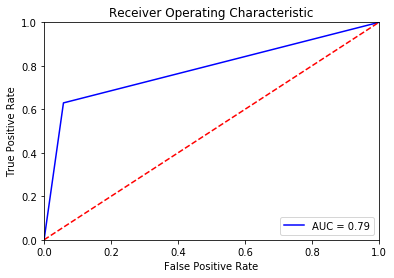

In [8]:
# Load model
with open('saved_models/model-{}-{}.pkl'.format(ALGORITHM, SUFFIX), 'rb') as f:
    model = pickle.load(f)

show_metrics_on_all_datasets(model, SUFFIX, ALGORITHM, with_all=False)

## Save model

In [7]:
save_model(model, 'model-{}-{}.pkl'.format(ALGORITHM, SUFFIX))

## Grid Search

In [14]:
%%time

# Grid Search for Algorithm Tuning
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

param_grid = {"n_estimators": [60, 100, 200],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# param_grid = {"max_depth": [3, None],
#               "max_features": [1, 3, 10],
#               "min_samples_split": [2, 3, 5, 10],
#               "min_samples_leaf": [1, 3, 10],
#               "bootstrap": [True, False],
#               "criterion": ["gini", "entropy"]}

# create and fit a ridge regression model, testing each alpha
model = RandomForestClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=metrics.make_scorer(metrics.f1_score))
grid.fit(X_train, Y_train.is_in_scope)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_params_)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [60, 100, 200], 'criterion': ['gini', 'entropy'], 'bootstrap': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(f1_score), verbose=0)
0.446063797568
{'bootstrap': False, 'criterion': 'entropy', 'n_estimators': 200}
CPU times: user 13min 24s, sys: 1min 15s, total: 14min 40s
Wall time: 15min 15s


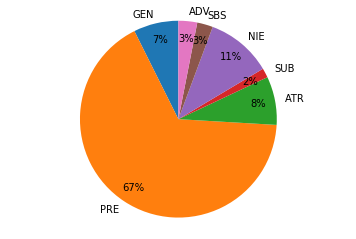

In [9]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'GEN', 'PRE', 'ATR', 'SUB', 'NIE', 'SBS', 'ADV'
sizes = [91, 823, 98, 19, 133, 32, 38]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.f%%', startangle=90, labeldistance=1.1, pctdistance=0.83)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.savefig('images/pie.svg')

plt.show()

In [6]:
import numpy as np
forest = model
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], X_train.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature 4 dist_neg_signal (0.113541)
2. feature 0 comma_between (0.101001)
3. feature 3 dist_end (0.061117)
4. feature 5 dist_start (0.049421)
5. feature 1 dist_comma_left (0.040308)
6. feature 2 dist_comma_right (0.034065)
7. feature 66 negator_slovny_druh_verbum (0.017873)
8. feature 21 negator_osoba_tretia (0.013327)
9. feature 244 word3_slovna_trieda_interpunkcia (0.011095)
10. feature 71 negator_vid_nedokonavy (0.009231)
11. feature 62 negator_slovny_druh_partikula (0.009082)
12. feature 68 negator_stupen_pozitiv (0.008499)
13. feature 8 is_negator (0.008053)
14. feature 45 negator_slovesna_forma_l_ove_pricastie (0.007587)
15. feature 47 negator_slovesna_forma_prezent (0.007388)
16. feature 214 word3_osoba_tretia (0.007036)
17. feature 12 negator_cislo_jednotne (0.006660)
18. feature 205 word3_cislo_jednotne (0.006642)
19. feature 70 negator_vid_dokonavy (0.005911)
20. feature 226 word3_paradigma_substantivna (0.005908)
21. feature 258 word3_slovny_druh_substan